In [1]:
import torch

In [2]:
from model import VariationalAutoEncoder

In [3]:
model = VariationalAutoEncoder(latent_dim=1024, kl_div_beta=0.90, device='cuda')

In [4]:
model = torch.load('vae_weights.pt', weights_only=False)

In [5]:
from train import get_dataloader

In [6]:
test, train = get_dataloader(1)

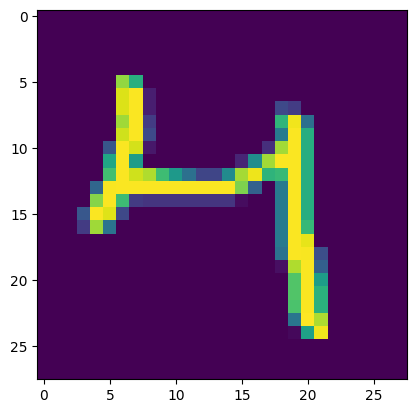

In [17]:
import matplotlib.pyplot as plt
img = next(iter(train))

plt.imshow(img[0].squeeze().squeeze())

In [18]:
model.to('cuda')

VariationalAutoEncoder(
  (encoder): Encoder(
    (encoder_block): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (latent_mean): Linear(in_features=1152, out_features=1024, bias=True)
    (latent_log_var): Linear(in_features=1152, out_features=1024, bias=True)
  )
  (decoder): Decoder(
    (decoder_block): Sequential(
      (0): ConvTranspose2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(2, 2), ou

In [19]:
recon, _ = model(img[0].to('cuda'))

In [20]:
recon

tensor([[[[8.8102e-06, 1.1566e-07, 2.2863e-08, 7.0350e-09, 8.0923e-09,
           2.5269e-07, 9.5239e-07, 3.8818e-05, 6.7533e-06, 1.9040e-05,
           1.7790e-05, 1.6787e-04, 2.4310e-05, 1.3395e-05, 5.1846e-06,
           5.5765e-05, 1.1174e-05, 1.6314e-05, 5.9036e-06, 5.3599e-05,
           4.4222e-06, 2.0768e-06, 2.6077e-07, 1.1307e-06, 2.2118e-06,
           1.1515e-05, 7.2177e-05, 3.9907e-02],
          [1.4765e-07, 9.4180e-11, 1.8501e-10, 3.3708e-11, 5.1616e-11,
           9.1143e-10, 4.3852e-08, 6.3873e-06, 1.2766e-06, 2.5198e-06,
           4.3195e-06, 5.7588e-05, 5.9476e-06, 1.1350e-06, 5.6058e-07,
           7.1242e-06, 1.4334e-06, 9.0708e-07, 7.0836e-07, 7.4223e-06,
           1.4812e-06, 5.2673e-07, 1.4474e-07, 3.1872e-07, 4.6921e-07,
           7.1632e-07, 8.2478e-06, 3.9907e-02],
          [3.8694e-09, 7.6267e-12, 1.3306e-11, 1.2240e-11, 4.2872e-11,
           1.0483e-08, 4.6663e-07, 1.0117e-05, 1.9377e-06, 7.3095e-06,
           2.8556e-05, 1.2676e-04, 4.8185e-06, 6.290

In [11]:
img[0]

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

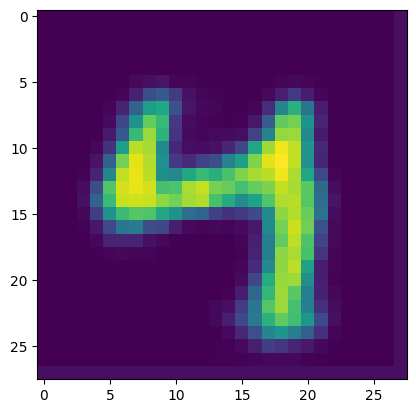

In [21]:
plt.imshow(recon.squeeze().detach().cpu())

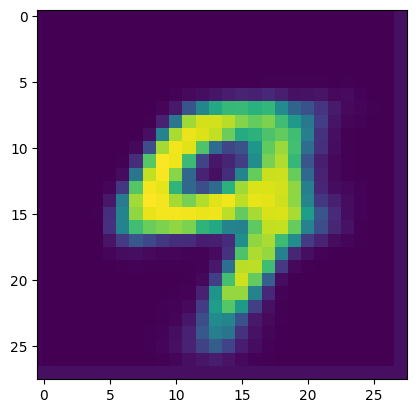

In [ ]:
z = torch.randn(size=(1024,), device='cuda') + .005
output = model.decoder(z).detach().cpu()
plt.imshow(output.squeeze().squeeze())

In [65]:
def morph_between(model, img1, img2, steps=20, device='cuda'):
    """
    Interpolates in latent space between two input images and decodes.
    """
    model.eval()
    img1, img2 = img1.to(device), img2.to(device)
    with torch.no_grad():
        mean1, logvar1 = model.encoder(img1)
        mean2, logvar2 = model.encoder(img2)
        z1 = mean1  # use mean for interpolation
        z2 = mean2

        imgs = []
        for alpha in np.linspace(0, 1, steps):
            z = (1 - alpha) * z1 + alpha * z2
            recon = model.decoder(z).squeeze().cpu()
            imgs.append(recon)

    fig, axes = plt.subplots(1, steps, figsize=(steps, 1))
    for i in range(steps):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

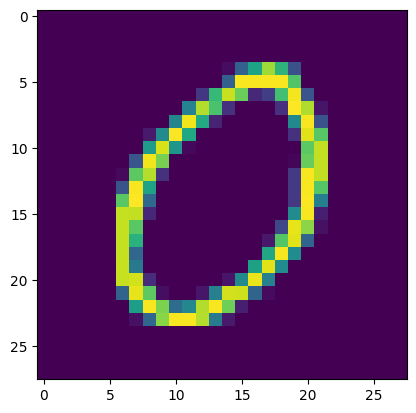

In [89]:
import matplotlib.pyplot as plt
img1 = next(iter(test))
img2 = next(iter(test))
plt.imshow(img2[0].squeeze().squeeze())

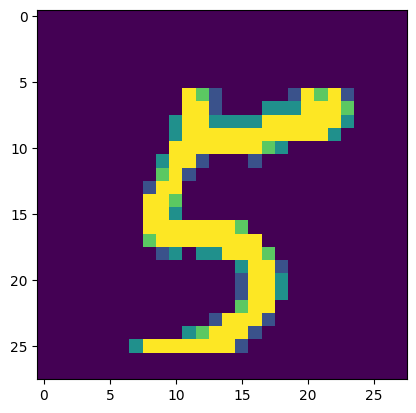

In [90]:
plt.imshow(img1[0].squeeze().squeeze())

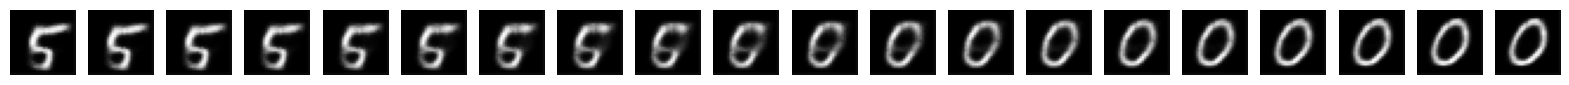

In [91]:
morph_between(model, img1=img1[0], img2=img2[0], steps=20, device='cuda')